<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.875 · Deep Learning · PEC2</p>
<p style="margin: 0; text-align:right;">2024-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 2: Redes neuronales recurrentes con Keras


<u>Consideraciones generales</u>:

- Esta PEC debe realizarse de forma **estrictamente individual**. Cualquier indicio de copia será penalizado con un suspenso (D) para todas las partes implicadas y la posible evaluación negativa de la asignatura de forma íntegra.
- Es necesario que el estudiante indique **todas las fuentes** que ha utilizado para la realización de la PEC. De no ser así, se considerará que el estudiante ha cometido plagio, siendo penalizado con un suspenso (D) y la posible evaluación negativa de la asignatura de forma íntegra.

<u>Formato de la entrega</u>:

- Algunos ejercicios pueden suponer varios minutos de ejecución, por lo que la entrega debe hacerse en **formato notebook** y en **formato html**, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a HTML desde el menú File $\to$ Download as $\to$ HTML.
- Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de la actividad. Para cambiar el tipo de celda a este tipo, en el menú: Cell $\to$ Cell Type $\to$ Markdown.

# 0. Contexto y carga de librerías

# Redes Neuronales Recurrentes

Las **redes neuronales recurrentes (RNNs)** se basan justamente en esta idea: son redes diseñadas para procesar secuencias, manteniendo un estado oculto que evoluciona con el tiempo y resume la información relevante del pasado. Así, las RNN permiten capturar patrones temporales y contextuales mucho más largos que los modelos clásicos de $n$-gramas, siendo una herramienta fundamental para tareas como generación de texto, análisis de sentimientos, traducción automática, entre otras.

**En esta práctica, en la primera parte exploraremos cómo funcionan las RNNs desde cero, implementando y entrenando una red básica para tareas de modelado de lenguaje. En la segunda, utilizaremos modelos ya implementados para aplicarlo a un problema real de estimación del consumo de energía.**


In [25]:
# LIBRERIAS NECESARIAS
import tensorflow as tf
import numpy as np

In [26]:
# !pip install "tensorflow<2.11"

# 1. Implementar una RNN desde Cero (Paso a Paso)

**1.1. Implementación RNN (Forward Pass) desde Cero**

**¿Qué es una RNN?**  
Una Red Neuronal Recurrente (RNN) es una arquitectura diseñada para procesar datos secuenciales (como texto o series de tiempo). Su característica clave es el **estado oculto** (`h_t`), que actúa como memoria dinámica almacenando información contextual de todos los pasos anteriores. A diferencia de los modelos de n-gramas, las RNNs pueden capturar dependencias a *largo plazo* mediante esta memoria recurrente, procesando secuencias de longitud variable de manera eficiente.

**Formulación Matemática**  
En cada paso de tiempo `t`, la RNN realiza dos acciones fundamentales:

1. **Actualización del estado oculto**:  
   Combina la entrada actual `x_t` y el estado oculto anterior `h_{t-1}` mediante una transformación lineal seguida de una no linealidad (usualmente `tanh`):

   $$
   h_t = \tanh(\underbrace{W_{xh} x_t}_{\text{Contribución actual}} + \underbrace{W_{hh} h_{t-1}}_{\text{Memoria pasada}} + b_h)
   $$

   - **$W_{xh}$**: Matriz de pesos que proyecta la entrada al espacio oculto (dimensión: `d × H`).
   - **$W_{hh}$**: Matriz de pesos recurrentes que actualiza la memoria (dimensión: `H × H`).
   - **$b_h$**: Vector de sesgo (dimensión: `H`).
   - **`tanh`**: Función de activación que acota valores entre [-1, 1], estabilizando gradientes.

2. **Generación de salida (se ve en el ejercicio 1.2.)**:  
   Para modelado del lenguaje, se suele añadir una capa lineal adicional que mapea $h_t$ a logits para predecir el próximo token:
   $$
   o_t = W_{ho} h_t + b_o
   $$
   Donde $W_{ho}$ (dimensión: `H × |Vocabulario|`) y $b_o$ son parámetros de salida.

**Flujo de Información**  
En cada paso $t$, la RNN procesa secuencialmente:
- Toma la entrada actual $x_t$ (ej: embedding de un carácter).
- Combina $x_t$ con el estado anterior $h_{t-1}$ para calcular $h_t$.
- Usa $h_t$ para predecir el siguiente elemento en la secuencia.

Esta recurrencia permite que la información fluya a través del tiempo, dando a la RNN su capacidad de *recordar* patrones temporales.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [0.75 pts.]:</strong> Define un modelo de Red Neuronal Recurrente (RNN) siguiendo los pasos para construir la arquitectura del modelo descrita a continuación:</p>
</div>

**Instrucciones para Implementar la RNN (Paso a Paso):**

**1. Crea una clase `RNNScratch`:**
-  Para ello, hereda de `tf.Module` para aprovechar las utilidades de TensorFlow-
- Define los siguientes atributos en el constructor:
  - `num_inputs`: Dimensión de los vectores de entrada (ej: tamaño del vocabulario o de embeddings).
  - `num_hiddens`: Dimensión del estado oculto (`H`).
  - `sigma`: Desviación estándar para inicialización de pesos.

**2. Dentro del constructor, define `W_xh`, `W_hh` y `b_h` como variables entrenables de TensorFlow.**
- **`W_xh`**: Pesos para proyectar la entrada `x_t` al espacio oculto.
  - Forma: `(num_inputs, num_hiddens)`.
  - Inicializado con valores aleatorios de distribución normal escalados por `sigma`.
- **`W_hh`**: Pesos recurrentes para propagar el estado oculto.
  - Forma: `(num_hiddens, num_hiddens)`.
  - Inicializado igual que `W_xh`.
- **`b_h`**: Sesgo del estado oculto.
  - Inicializado con ceros (forma `(num_hiddens,)`).

**3. Implementar el método `forward`:**
- Esta función recibirá dos parámetros:
  - `inputs`: Tensor de forma `(T, batch_size, num_inputs)`, donde `T` es la longitud de la secuencia.
  - `state`: Estado oculto inicial (si es `None`, se inicializa con ceros).
- La lógica dentro de esta funcion es la siguiente:
  - Verificamos si `state` no se proporciona (es None), inicializarlo como tensor de ceros con forma `(batch_size, num_hiddens)`.
  - A continuación,  es necesario iterar sobre cada paso de tiempo `T` (ej: bucle for):
    - Para cada X que recibimos que tiene la forma `(batch_size, num_inputs)` en :
      - Calcular `tf.matmul(X, self.W_xh)`: Proyección de la entrada actual.
      - Calcular `tf.matmul(state, self.W_hh)`: Contribución del estado anterior.
      - Sumar ambos términos y el sesgo `self.b_h`.
      - Aplicar `tanh` para obtener el nuevo estado: `state = tf.tanh(...)`.
    - Almacenar el estado en una lista de `outputs` (que tiene que ser previamente inicializada).

**Pistas:**
- **Batch Processing**: Cada `X` en el bucle tiene forma `(batch_size, num_inputs)`, permitiendo procesar múltiples secuencias en paralelo.
- **Recurrencia**: El estado `state` se actualiza en cada paso y se pasa al siguiente, manteniendo la memoria temporal.
- **Salida**: `outputs` es una lista con los estados ocultos en cada paso, útil para conectar a capas posteriores (ej: predicción de tokens).

In [27]:
# Completa el ejercicio

class RNNScratch(tf.Module):
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        # Rellenar lógica del constructor
        super().__init__()
        self.num_inputs = num_inputs
        self.num_hiddens = num_hiddens
        self.sigma = sigma

        self.W_xh = tf.Variable(tf.random.normal(
            shape = (num_inputs, num_hiddens), stddev=sigma),
            trainable = True)
        
        self.W_hh = tf.Variable(tf.random.normal(
            shape = (num_hiddens, num_hiddens), stddev=sigma),
            trainable = True)
        
        self.b_h = tf.Variable(tf.zeros(shape = (num_hiddens,)), trainable = True)

    def forward(self, inputs, state=None):
        # Rellenar lógica de la función
        T, batch_size, _ = inputs.shape
        outputs = []
        if state is None:
            state = tf.zeros((batch_size, self.num_hiddens))
        for i in range(T):
            x = inputs[i]
            state = tf.tanh(
                tf.matmul(x, self.W_xh) +
                tf.matmul(state, self.W_hh) +
                self.b_h
            )
            outputs.append(state)
        outputs = tf.stack(outputs, axis=0)
        return outputs, state

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [0.25]:</strong> Verifica su funcionamiento con la siguiente celda y responde a la siguiente pregunta en una sola línea ¿De qué está compuesto la variable 'outputs'?</p>
</div>

In [28]:
batch_size, num_inputs, num_hiddens, num_steps = 2, 16, 32, 100
rnn = RNNScratch(num_inputs, num_hiddens)
X = tf.ones((num_steps, batch_size, num_inputs))
outputs, state = rnn.forward(X)  # Use forward() instead of calling rnn directly

Outputs -> contains the hidden states at each time step for each sequence in the batch

In [29]:
outputs[0:1]

<tf.Tensor: shape=(1, 2, 32), dtype=float32, numpy=
array([[[ 0.02887326, -0.0235285 , -0.02554542,  0.0275913 ,
         -0.01761433, -0.0359632 ,  0.10060586,  0.01081209,
         -0.01693506, -0.01827034, -0.06836825,  0.03366514,
          0.01879559, -0.03494026,  0.01133096,  0.03508867,
          0.03508565,  0.016113  ,  0.05789818, -0.02145912,
         -0.08508293, -0.03119358, -0.0450695 , -0.00254308,
         -0.03545068,  0.04821122,  0.0113359 , -0.05166255,
          0.05547689, -0.0531472 ,  0.03607816,  0.01565692],
        [ 0.02887326, -0.0235285 , -0.02554542,  0.0275913 ,
         -0.01761433, -0.0359632 ,  0.10060586,  0.01081209,
         -0.01693506, -0.01827034, -0.06836825,  0.03366514,
          0.01879559, -0.03494026,  0.01133096,  0.03508867,
          0.03508565,  0.016113  ,  0.05789818, -0.02145912,
         -0.08508293, -0.03119358, -0.0450695 , -0.00254308,
         -0.03545068,  0.04821122,  0.0113359 , -0.05166255,
          0.05547689, -0.0531472

## 1.2. RNN para Modelo del Lenguaje

Ahora que ya tienes implementada la clase `RNNScratch`, el siguiente paso es usarla como base para construir un **modelo de lenguaje**. Este tipo de modelos son la base de sistemas de autocompletado de texto, predicción de palabras o generación de texto.

### ¿Qué cambia ahora?

Cuando trabajamos con modelos de lenguaje, **las entradas y las salidas pertenecen al mismo vocabulario**. Por ejemplo, si estás entrenando un modelo para predecir la próxima palabra en una frase, tanto la palabra actual (entrada) como la siguiente (salida esperada) son palabras del vocabulario. Esto significa que:

- Cada palabra se codifica como un vector (por ejemplo, one-hot).
- La dimensión de estos vectores es igual al tamaño del vocabulario.
- La salida del modelo debe ser una predicción sobre cuál es el próximo token, también expresado en términos del vocabulario.

### ¿Qué se proporciona?
- La clase `RNNLMScratch`.

- **`__init__`**: recibe la RNN previamente definida, el tamaño del vocabulario (ya que tanto la entrada como la salida están en este espacio) y una tasa de aprendizaje.
  
- **`init_params`**: define los pesos y sesgos de la capa de salida. Esta capa toma el estado oculto en cada paso y genera una distribución sobre el vocabulario (probabilidad de que cada palabra sea la siguiente).



In [30]:
class RNNLMScratch(tf.Module):
    """ RNN-based language model """
    def __init__(self, rnn, vocab_size, lr=0.01):
        super().__init__()

        self.init_params()

    def init_params(self):
        self.W_hq = tf.Variable(tf.random.normal(
            (self.rnn.num_hiddens, self.vocab_size)) * self.rnn.sigma)
        self.b_q = tf.Variable(tf.zeros(self.vocab_size))


## 1.2.1. Codificación One-Hot

¿Qué es la codificación one-hot? Cada token (carácter) se representa como un vector de longitud igual al tamaño del vocabulario, con un 1 en el índice correspondiente al token y 0 en las demás posiciones.

Por ejemplo, si `vocab = {'a':0, 'b':1, 'c':2}`, entonces:
- `one_hot(0)` → `[1, 0, 0]`
- `one_hot(2)` → `[0, 0, 1]`

In [31]:
class RNNLMScratch(tf.Module):
    """ RNN-based language model """
    def __init__(self, rnn, vocab_size, lr=0.01):
        super().__init__()

        self.init_params()

    def init_params(self):
        self.W_hq = tf.Variable(tf.random.normal(
            (self.rnn.num_hiddens, self.vocab_size)) * self.rnn.sigma)
        self.b_q = tf.Variable(tf.zeros(self.vocab_size))

    # Añadimos la funcion one-hot
    def one_hot(self, X):
        return tf.one_hot(tf.transpose(X), self.vocab_size)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [0.5 pts.]:</strong> ¿Podrías decir qué es lo que hace la función anterior one_hot sobre la matriz X dado un tamaño de vocabulario?</p>
</div>

Completa el ejercicio con una explicación breve

Basically it transposes the input matrix X, (because it is batch_size, T, and it should be T, batch_size, to match the RNN), converting each index into a one-hot vector equal in length to the vocabulary size. It returns a tensor with the following structure T, batch_size, vocab_size

## 1.2.2. Capa de Salida

Después de obtener cada estado oculto $h_t $, queremos proyectarlo al espacio del vocabulario:

$
o_t = h_t W_{hq} + b_q
$

Donde:
- $h_t \in \mathbb{R}^{H} $
- $W_{hq} \in \mathbb{R}^{H \times V} $
- $b_q \in \mathbb{R}^{V} $

$o_t \in \mathbb{R}^{V} $: puntuaciones sin normalizar (logits) sobre el vocabulario.

Por último, es necesario añadir una función `output_layer` dentro de nuestra clase `RNNLMScratch` que toma todos los estados ocultos producidos por la RNN y, para cada uno, aplica la transformación lineal (`W_hq`, `b_q`) que proyecta ese vector al espacio del vocabulario. Luego los apila para devolver un tensor de forma `(batch_size, T, vocab_size)`.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [0.25 pts.]:</strong> Añade la capa final de la salida en la clase con la que estamos trabajando:</p>
</div>

Implementa el método `output_layer(self, rnn_outputs)` dentro de la clase `RNNLMScratch`, que debe hacer lo siguiente:

1. Recibe una lista de tensores `rnn_outputs`, que son los estados ocultos generados por la RNN en cada paso de la secuencia. Cada uno de estos tensores tiene forma `(batch_size, num_hiddens)`.
2. Para cada estado oculto `H`, aplica una capa lineal:  
  
   $\text{output} = H \cdot W_{hq} + b_q$
   
   Donde:
   - `W_hq` es una matriz de pesos de forma `(num_hiddens, vocab_size)`
   - `b_q` es un vector de sesgo de forma `(vocab_size,)`
3. Devuelve un único tensor de forma `(batch_size, T, vocab_size)`, donde `T` es la longitud de la secuencia.

**Pista**: puedes usar `tf.stack` para convertir la lista de predicciones por paso en un único tensor.

In [32]:
# Completa el ejercicio
class RNNLMScratch(tf.Module):
    def __init__(self, rnn, vocab_size, lr=0.01):
        super().__init__()
        self.rnn = rnn
        self.vocab_size = vocab_size
        self.lr = lr
        self.init_params()

    def init_params(self):
        self.W_hq = tf.Variable(tf.random.normal(
            (self.rnn.num_hiddens, self.vocab_size)) * self.rnn.sigma)
        self.b_q = tf.Variable(tf.zeros(self.vocab_size))

    # Añadimos la funcion one-hot
    def one_hot(self, X):
        return tf.one_hot(tf.transpose(X), self.vocab_size)

    def output_layer(self, rnn_outputs):
        outputs = []
        for i in rnn_outputs:
            out = tf.matmul(i, self.W_hq) + self.b_q
            outputs.append(out)
        outputs = tf.stack(outputs, axis=0)
        return outputs
    ##############################################
    def forward(self, X, state=None):
        X = self.one_hot(X)  # Convertimos a one-hot: (T, batch_size, vocab_size)
        rnn_outputs, state = self.rnn.forward(X, state)
        logits = self.output_layer(rnn_outputs)  # (batch_size, T, vocab_size)
        return logits, state

    def loss(self, logits, labels):
        loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits)
        return tf.reduce_mean(loss)

    def train_step(self, X, y, state=None):
        with tf.GradientTape() as tape:
            logits, state = self.forward(X, state)
            l = self.loss(logits, y)

        params = [self.W_hq, self.b_q, self.rnn.W_xh, self.rnn.W_hh, self.rnn.b_h]
        grads = tape.gradient(l, params)

        for p, g in zip(params, grads):
            p.assign_sub(self.lr * g)

        return l, state

## Ejercicio 1.2.3: Entrenamiento del Modelo de Lenguaje

Vamos a **unir todas las piezas** para construir un **modelo de lenguaje entrenable desde cero**.
Primero copia los siguientes métodos para completar la clase `RNNLMScratch` con los siguientes métodos:
   - `forward`: ejecuta una pasada completa por el modelo (one-hot → RNN → capa de salida).
   - `loss`: calcula la pérdida cross-entropy entre la predicción y la secuencia esperada.
   - `train_step`: realiza una actualización de parámetros usando `GradientTape`.

```python
def forward(self, X, state=None):
    X = self.one_hot(X)  # Convertimos a one-hot: (T, batch_size, vocab_size)
    rnn_outputs, state = self.rnn.forward(X, state)
    logits = self.output_layer(rnn_outputs)  # (batch_size, T, vocab_size)
    return logits, state

def loss(self, logits, labels):
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits)
    return tf.reduce_mean(loss)

def train_step(self, X, y, state=None):
    with tf.GradientTape() as tape:
        logits, state = self.forward(X, state)
        l = self.loss(logits, y)

    params = [self.W_hq, self.b_q, self.rnn.W_xh, self.rnn.W_hh, self.rnn.b_h]
    grads = tape.gradient(l, params)

    for p, g in zip(params, grads):
        p.assign_sub(self.lr * g)

    return l, state
```

Vamos a validar que todo tu modelo funciona correctamente, **creando datos ficticios**. Usaremos enteros aleatorios como si fueran IDs de palabras de un vocabulario.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [0.25 pts.]: </strong> Debes instanciar el modelo de RNN y el de RNNLMScratch. Posteriormente inicializa de manera aleatoria los conjunto de datos X_train y y_train con un tamaño de vocabulario `vocab_size`. Finalmente entrena el modelo con el código que te hemos proporcionado. </p>
</div>

In [33]:
# Completa el ejercicio

# Parámetros para generar datos simulados
vocab_size = 10       # Número de palabras en el vocabulario
num_hiddens = 32      # Tamaño del estado oculto
num_steps = 5         # Longitud de las secuencias
batch_size = 2        # Número de ejemplos en paralelo

# Instanciamos el modelo base y el modelo de lenguaje
rnn = RNNScratch(num_inputs=vocab_size, num_hiddens=num_hiddens)
model = RNNLMScratch(rnn, vocab_size)

# Creamos datos aleatorios que simulan secuencias de palabras
X_train = tf.random.uniform(
    shape = (
        num_steps, batch_size),
        minval = 0,
        maxval = vocab_size,
        dtype = tf.int32
    )

y_train = tf.random.uniform(
    shape = (
        batch_size, num_steps),
        minval = 0,
        maxval = vocab_size,
        dtype = tf.int32
    )
                                    
# Entrenamiento simple durante 100 épocas
num_epochs = 100
state = None
for epoch in range(num_epochs):
    loss, state = model.train_step(X_train, y_train, state)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.numpy():.4f}')



Epoch 10, Loss: 2.2935
Epoch 20, Loss: 2.2837
Epoch 30, Loss: 2.2741
Epoch 40, Loss: 2.2647
Epoch 50, Loss: 2.2555
Epoch 60, Loss: 2.2465
Epoch 70, Loss: 2.2376
Epoch 80, Loss: 2.2289
Epoch 90, Loss: 2.2204
Epoch 100, Loss: 2.2121


# 2. Implementación de una GRU desde Cero

Una vez comprendido cómo funciona una RNN simple, es momento de ir un paso más allá y construir una **GRU (Gated Recurrent Unit)**. Esta arquitectura introduce mecanismos de control más sofisticados que mejoran el flujo de información y mitigan el problema del desvanecimiento del gradiente.



## 2.1. Crea una clase `GRUScratch`:
- Hereda de `tf.Module` para organizar los parámetros y facilitar el seguimiento con TensorFlow.
- En el constructor define los siguientes atributos:
  - `num_inputs`: Dimensión de los vectores de entrada.
  - `num_hiddens`: Dimensión del estado oculto (`H`).
  - `sigma`: Escala para inicializar los pesos con una distribución normal.


### **1. Define los pesos y sesgos necesarios para las puertas de la GRU:**

Una GRU utiliza tres componentes principales:
- **Puerta de reinicio (`r`)**: decide cuánto del estado anterior debe olvidarse.
- **Puerta de actualización (`z`)**: decide cuánto del nuevo estado candidato se incorpora.
- **Estado candidato (`h̃_t`)**: nueva información calculada que puede reemplazar al estado anterior.

Cada componente tiene sus propios pesos:

#### **Pesos para las entradas `x_t`**:
- `W_xr`: para la puerta de reinicio → forma `(num_inputs, num_hiddens)`
- `W_xz`: para la puerta de actualización → forma `(num_inputs, num_hiddens)`
- `W_xh`: para el estado candidato → forma `(num_inputs, num_hiddens)`

#### **Pesos para los estados anteriores `h_{t-1}`**:
- `W_hr`: recurrente de la puerta de reinicio → forma `(num_hiddens, num_hiddens)`
- `W_hz`: recurrente de la puerta de actualización → forma `(num_hiddens, num_hiddens)`
- `W_hh`: recurrente del estado candidato → forma `(num_hiddens, num_hiddens)`

#### **Sesgos (bias)**:
- `b_r`, `b_z`, `b_h`: uno por cada componente, de forma `(num_hiddens,)`

Todos estos pesos deben ser inicializados:
- Los pesos con una distribución normal escalada por `sigma`.
- Los sesgos con ceros.


### **2. Implementa el método `forward`:**
- Este método recibe:
  - `inputs`: Tensor de forma `(T, batch_size, num_inputs)` (secuencia temporal).
  - `state`: Estado oculto inicial. Si no se proporciona, se inicializa con ceros.

#### **Lógica del paso temporal**:
Para cada paso de tiempo `t`, con entrada `X_t` y estado oculto `h_{t-1}`:

1. **Calcula la puerta de reinicio (`r`)**:
   $
   r_t = \sigma(X_t W_{xr} + h_{t-1} W_{hr} + b_r)
   $

2. **Calcula la puerta de actualización (`z`)**:
   $
   z_t = \sigma(X_t W_{xz} + h_{t-1} W_{hz} + b_z)
   $

3. **Calcula el estado candidato**:
   $
   \tilde{h}_t = \tanh(X_t W_{xh} + (r_t \odot h_{t-1}) W_{hh} + b_h)
   $

4. **Actualiza el estado oculto**:
   $
   h_t = z_t \odot h_{t-1} + (1 - z_t) \odot \tilde{h}_t
   $

5. **Añade `h_t` a la lista de salidas `outputs`**.

- Al final, devuelve `outputs` (una lista con los estados ocultos de cada paso) y el último estado `h_T`.

---

###  Pistas:
- **Uso de `tf.sigmoid` y `tf.tanh`**: esenciales para las puertas y el estado candidato.
- **Producto elemento a elemento (`*`)**: es el operador que representa la multiplicación Hadamard (también conocida como `\odot`).
- **Inicialización del estado**: si no se recibe un `state`, inicialízalo como `tf.zeros((batch_size, num_hiddens))`.
- **Estructura final del código**: similar a una RNN, pero con más pasos por iteración.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [1 pts.]:</strong> Implementa la clase GRUScratch:</p>
</div>

In [34]:
# Completa el ejercicio

class GRUScratch():
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.num_inputs = num_inputs
        self.num_hiddens = num_hiddens
        self.sigma = sigma

        self.W_xr = tf.Variable(tf.random.normal((num_inputs, num_hiddens)) * sigma)
        self.W_hr = tf.Variable(tf.random.normal((num_hiddens, num_hiddens)) * sigma)
        self.b_r = tf.Variable(tf.zeros(num_hiddens))

        self.W_xz = tf.Variable(tf.random.normal((num_inputs, num_hiddens)) * sigma)
        self.W_hz = tf.Variable(tf.random.normal((num_hiddens, num_hiddens)) * sigma)
        self.b_z = tf.Variable(tf.zeros(num_hiddens))

        self.W_xh = tf.Variable(tf.random.normal((num_inputs, num_hiddens)) * sigma)
        self.W_hh = tf.Variable(tf.random.normal((num_hiddens, num_hiddens)) * sigma)
        self.b_h = tf.Variable(tf.zeros(num_hiddens))

    def forward(self, inputs, state=None):
        T, batch_size, _ = inputs.shape

        if state is None:
            state = tf.zeros((batch_size, self.num_hiddens))
        outputs = []

        for i in range(T):
            X_t = inputs[i]

            r_t = tf.sigmoid(tf.matmul(X_t, self.W_xr) + tf.matmul(state, self.W_hr) + self.b_r)
            z_t = tf.sigmoid(tf.matmul(X_t, self.W_xz) + tf.matmul(state, self.W_hz) + self.b_z)
            h_t = tf.tanh(tf.matmul(X_t, self.W_xh) + tf.matmul(r_t * state, self.W_hh) + self.b_h)

            state = z_t * state + (1 - z_t) * h_t

            outputs.append(state)


        return outputs, state

**Verificación del funcionamiento:**

In [35]:
batch_size, num_inputs, num_hiddens, num_steps = 3, 10, 20, 5
gru = GRUScratch(num_inputs, num_hiddens)
X = tf.random.uniform((num_steps, batch_size, num_inputs))
outputs, state = gru.forward(X)
print(len(outputs), outputs[0].shape) # Debería mostrar (5, (3,20))

5 (3, 20)


# 2.2. GRULMScratch

Ahora debemos crear la clasee `GRULMScratch`. Esta clase implementará un **modelo de lenguaje** que utiliza como núcleo una GRU construida desde cero (`GRUScratch`).


- Hereda de `tf.Module` para facilitar la organización de parámetros.
- El constructor (`__init__`) debe recibir:
  - Una instancia de `GRUScratch`
  - El tamaño del vocabulario (`vocab_size`)
  - La tasa de aprendizaje (`lr`)

### **1. Define la capa de salida del modelo**
Dentro de un método `init_params`, crea los pesos que proyectan el estado oculto hacia el espacio del vocabulario (igual que hiciste con la RNN):

- `W_hq`: pesos de forma `(num_hiddens, vocab_size)`, inicializados con normal(`sigma`)
- `b_q`: sesgo de forma `(vocab_size,)`, inicializado a ceros

Estos parámetros permiten convertir el estado oculto en una **distribución de probabilidad sobre el vocabulario**.

### **2. Añade la función `one_hot(X)`**
Esta función convierte las secuencias de enteros en vectores one-hot. Recuerda hacer un `tf.transpose(X)` para que la forma sea `(T, batch_size)` antes de aplicar `tf.one_hot`.

### **3. Implementa `output_layer(rnn_outputs)`**
Este método recibe una lista de estados ocultos de la GRU, y para cada uno aplica:

$
\text{logits}_t = h_t \cdot W_{hq} + b_q
$

Finalmente, apila los logits con `tf.stack` para obtener una salida de forma `(batch_size, T, vocab_size)`.


### **4. Pega las siguientes funciones proporcionadas dentro de la clase**

```python
 def forward(self, X, state=None):
        X = self.one_hot(X)                          # (T, batch_size, vocab_size)
        rnn_outputs, state = self.gru.forward(X, state)
        logits = self.output_layer(rnn_outputs)      # (batch_size, T, vocab_size)
        return logits, state

    def loss(self, logits, labels):
        # logits: (batch_size, T, vocab_size), labels: (batch_size, T)
        loss = tf.nn.sparse_softmax_cross_entropy_with_logits(
            labels=labels, logits=logits
        )
        return tf.reduce_mean(loss)

    def train_step(self, X, y, state=None):
        with tf.GradientTape() as tape:
            logits, state = self.forward(X, state)
            l = self.loss(logits, y)

        # Gradientes de todos los parámetros
        params = [
            self.W_hq, self.b_q,
            self.gru.W_xr, self.gru.W_xz, self.gru.W_xh,
            self.gru.W_hr, self.gru.W_hz, self.gru.W_hh,
            self.gru.b_r, self.gru.b_z, self.gru.b_h
        ]
        grads = tape.gradient(l, params)

        # Actualizamos manualmente los parámetros
        for p, g in zip(params, grads):
            p.assign_sub(self.lr * g)

        return l, state
```


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [0.5 pts.]:</strong> Implementa la clase GRULMScratch:</p>
</div>

In [36]:
# Completa el ejercicio

class GRULMScratch(tf.Module):
    def __init__(self, gru, vocab_size, lr=0.01):
        super().__init__()
        self.gru = gru
        self.vocab_size = vocab_size
        self.lr = lr
        self.init_params()

    def init_params(self):
        self.W_hq = tf.Variable(tf.random.normal(
            (self.gru.num_hiddens, self.vocab_size)) * self.gru.sigma)
        self.b_q = tf.Variable(tf.zeros(self.vocab_size))

    def one_hot(self, X):
        return tf.one_hot(tf.transpose(X), self.vocab_size)

    def output_layer(self, rnn_outputs):
        outputs = []
        for i in rnn_outputs:
            logits_t = tf.matmul(i, self.W_hq) + self.b_q
            outputs.append(logits_t)
        outputs = tf.stack(outputs, axis=0)
        outputs = tf.transpose(outputs, perm=[1, 0, 2])
        return outputs


    ######

    def forward(self, X, state=None):
        X = self.one_hot(X)                          # (T, batch_size, vocab_size)
        rnn_outputs, state = self.gru.forward(X, state)
        logits = self.output_layer(rnn_outputs)      # (batch_size, T, vocab_size)
        return logits, state

    def loss(self, logits, labels):
        # logits: (batch_size, T, vocab_size), labels: (batch_size, T)
        loss = tf.nn.sparse_softmax_cross_entropy_with_logits(
            labels=labels, logits=logits
        )
        return tf.reduce_mean(loss)

    def train_step(self, X, y, state=None):
        with tf.GradientTape() as tape:
            logits, state = self.forward(X, state)
            l = self.loss(logits, y)

        # Gradientes de todos los parámetros
        params = [
            self.W_hq, self.b_q,
            self.gru.W_xr, self.gru.W_xz, self.gru.W_xh,
            self.gru.W_hr, self.gru.W_hz, self.gru.W_hh,
            self.gru.b_r, self.gru.b_z, self.gru.b_h
        ]
        grads = tape.gradient(l, params)

        # Actualizamos manualmente los parámetros
        for p, g in zip(params, grads):
            p.assign_sub(self.lr * g)

        return l, state




# 2.3. Entrena un autocompletador de texto con una GRU

En este ejercicio final vamos a **entrenar nuestro modelo de lenguaje GRU desde cero** usando un vocabulario muy pequeño:  
**`["hola", "mundo", "buenos", "días"]`**.

### ¿Qué vamos a hacer?

1. **Definir el vocabulario** y convertir cada palabra a su índice numérico.
2. **Crear secuencias de entrenamiento**, simulando frases reales.
3. **Entrenar el modelo GRU** para que aprenda a predecir la siguiente palabra en una secuencia.
4. **Probar el autocompletador**, escribiendo una palabra inicial (como `"hola"`) y dejando que el modelo genere el resto.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
  <p><strong>Ejercicio [0.5 pts.]:</strong> Ejecuta el código siguiente y responde brevemente a las siguientes preguntas:</p>
  
  <ol>
    <li><strong>¿Qué hace la función <code>one_hot</code> dentro del modelo?</strong></li>
    <li><strong>¿Qué representa el <code>state</code> en las GRU y por qué lo reutilizamos entre predicciones?</strong></li>
    <li><strong>¿Por qué usamos <code>sparse_softmax_cross_entropy_with_logits</code> en vez de <code>MSE</code>?</strong></li>
    <li><strong>¿Qué problema tendría el modelo si entrenamos con secuencias aleatorias sin sentido?</strong></li>
    <li><strong>¿Qué hace la capa de salida del modelo (<code>W_hq</code>, <code>b_q</code>)?</strong></li>
    <li><strong>¿Qué pasaría si cambiamos el vocabulario después del entrenamiento?</strong></li>
    <li><strong>¿Qué ocurre si no reutilizamos el estado <code>state</code> entre predicciones consecutivas?</strong></li>
  </ol>
</div>


### 1. What does one_hot do?
- It takes word indixes into one hot vectors. Each vector has a dimension equals to the vocabulary size and a single 1 at the position corresponding to the word's index
### 2. What does the state represent in GRUs and why do we reuse it between predictions?
- The state is basically the GRU's  hidden state, that has the information from the previous time steps. It's reused to maintain the sequence's memory and continuity to predict the next word
### 3. Why do we use sparse_softmax_cross_entropy_with_logits instead of MSE?
- Because MSE is used to measure erros for continuos values, and cross-entropy measures the difference between probability distributions. 
### 4. What problem would the model have if we trained it with random, nonsensical sequences?
- It would generate random values for results, because there's no structure to learn from
### 5. What does the model's output layer W_hq, b_q do?
- It produces logits that represents the scores for each possible word by projecting the GRU'S hidden state into the vocabulary "space"
### 6. What would happen if we changed the vocabulary after training?
- It would give an error because the one-hot vector would no longer match what the model had created
### 7. What happens if we do not reuse the state between consecutive predictions?
- The model then would "forget" the context from earlier time steps, giving lack of coherence with the previous result

In [37]:
# Vocabulario toy
vocab = ["hola", "mundo", "buenos", "días"]
token2idx = {word: i for i, word in enumerate(vocab)}
idx2token = {i: word for word, i in token2idx.items()}
vocab_size = len(vocab)
gru = GRUScratch(num_inputs=vocab_size, num_hiddens=num_hiddens)
model = GRULMScratch(gru, vocab_size)


def predict_next_token(model, prefix_tokens, state=None):
    """
    Recibe una secuencia de tokens (palabras), y predice la siguiente palabra.
    """
    # Convertimos palabras a índices
    idx_seq = [token2idx.get(tok, 0) for tok in prefix_tokens]  # (ej. ["hola"] → [0])
    input_tensor = tf.convert_to_tensor([idx_seq], dtype=tf.int32)  # (1, T)

    # Hacemos una pasada hacia adelante
    logits, state = model.forward(input_tensor, state)

    # Tomamos el último paso temporal
    last_logits = logits[:, -1, :]  # (batch_size, vocab_size)
    predicted_idx = tf.argmax(last_logits, axis=-1).numpy()[0]  # índice más probable

    return idx2token[predicted_idx], state


In [38]:
# Dataset de entrenamiento (tokens como índices)
train_sentences = [
    ["hola", "mundo", "buenos", "días"],
    ["buenos", "días", "hola", "mundo"],
    ["hola", "buenos", "días", "mundo"],
    ["días", "hola", "mundo", "buenos"]
]

# Convertimos a índices
X_train = []
y_train = []
for seq in train_sentences:
    idx_seq = [token2idx[word] for word in seq]
    X_train.append(idx_seq[:-1])  # input
    y_train.append(idx_seq[1:])   # target

X_train = tf.convert_to_tensor(X_train, dtype=tf.int32)  # (batch_size, T)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)

# Hiperparámetros
num_epochs = 1000
state = None

for epoch in range(num_epochs):
    loss, state = model.train_step(X_train, y_train, state)
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}")

input_words = ["hola"]
state = None

for _ in range(5):
    next_word, state = predict_next_token(model, input_words, state)
    input_words.append(next_word)

print("Frase generada:", " ".join(input_words))


Epoch 50, Loss: 1.3802
Epoch 100, Loss: 1.3753
Epoch 150, Loss: 1.3715
Epoch 200, Loss: 1.3686
Epoch 250, Loss: 1.3662
Epoch 300, Loss: 1.3644
Epoch 350, Loss: 1.3629
Epoch 400, Loss: 1.3618
Epoch 450, Loss: 1.3609
Epoch 500, Loss: 1.3601
Epoch 550, Loss: 1.3595
Epoch 600, Loss: 1.3590
Epoch 650, Loss: 1.3586
Epoch 700, Loss: 1.3582
Epoch 750, Loss: 1.3579
Epoch 800, Loss: 1.3576
Epoch 850, Loss: 1.3573
Epoch 900, Loss: 1.3571
Epoch 950, Loss: 1.3569
Epoch 1000, Loss: 1.3566
Frase generada: hola mundo mundo mundo mundo mundo


# 3. Implementación de una LSTM desde Cero

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio 3 [1 pts.]:</strong> Implementa una unidad LSTM (Long Short-Term Memory) desde cero siguiendo estos pasos:</p>
</div>

### 1. Define la clase `LSTMScratch`:
- Para ello, hereda de `tf.Module` para aprovechar las utilidades de TensorFlow.
- Define los siguientes atributos en el constructor:
  - `num_inputs`: Dimensión de los vectores de entrada (por ejemplo, tamaño del vocabulario o de los embeddings).
  - `num_hiddens`: Dimensión del estado oculto (`H`).
  - `sigma`: Desviación estándar para la inicialización de pesos.


### 2. Dentro del constructor, define los pesos y sesgos como variables entrenables de TensorFlow:

La LSTM contiene cuatro componentes clave: la puerta de olvido, la puerta de entrada, la celda candidata y la puerta de salida. Cada uno de ellos requiere sus propios pesos y sesgos, tanto para la entrada actual `x_t` como para el estado oculto anterior `h_{t-1}`.

- **Puerta de olvido (`f_t`)**
  - `W_xf`: Pesos para la entrada → forma `(num_inputs, num_hiddens)`
  - `W_hf`: Pesos recurrentes → forma `(num_hiddens, num_hiddens)`
  - `b_f`: Sesgo → forma `(num_hiddens,)`

- **Puerta de entrada (`i_t`)**
  - `W_xi`: Pesos para la entrada → forma `(num_inputs, num_hiddens)`
  - `W_hi`: Pesos recurrentes → forma `(num_hiddens, num_hiddens)`
  - `b_i`: Sesgo → forma `(num_hiddens,)`

- **Celda candidata (`c̃_t`)**
  - `W_xc`: Pesos para la entrada → forma `(num_inputs, num_hiddens)`
  - `W_hc`: Pesos recurrentes → forma `(num_hiddens, num_hiddens)`
  - `b_c`: Sesgo → forma `(num_hiddens,)`

- **Puerta de salida (`o_t`)**
  - `W_xo`: Pesos para la entrada → forma `(num_inputs, num_hiddens)`
  - `W_ho`: Pesos recurrentes → forma `(num_hiddens, num_hiddens)`
  - `b_o`: Sesgo → forma `(num_hiddens,)`

Todos los pesos deben inicializarse con una distribución normal escalada por `sigma`, y todos los sesgos deben inicializarse con ceros.


### 3. Implementar el método `forward`:
- Esta función recibe dos parámetros:
  - `inputs`: Tensor de forma `(T, batch_size, num_inputs)`, donde `T` es la longitud de la secuencia.
  - `state`: Estado inicial compuesto por dos tensores `(h, c)`:
    - `h`: estado oculto
    - `c`: estado de la celda
    Si no se proporciona, ambos deben inicializarse a ceros con forma `(batch_size, num_hiddens)`.

- La lógica dentro de esta función es la siguiente:
  - Iterar sobre cada paso de tiempo `t` de la secuencia de entrada.
  - Para cada entrada `X` con forma `(batch_size, num_inputs)`:
    - Calcular la puerta de olvido `f_t` aplicando una función sigmoide.
    - Calcular la puerta de entrada `i_t` aplicando una función sigmoide.
    - Calcular la puerta de salida `o_t` aplicando una función sigmoide.
    - Calcular la celda candidata `c̃_t` aplicando una función `tanh`.
    - Actualizar la celda `c` como:  
      `c = f_t * c + i_t * c̃_t`
    - Actualizar el estado oculto `h` como:  
      `h = o_t * tanh(c)`
    - Añadir `h` a la lista de salidas `outputs`.

- Al finalizar, devuelve:
  - La lista `outputs`, que contiene el estado oculto en cada paso de la secuencia.
  - El estado final `(h, c)` que puede reutilizarse para predicciones futuras.



### Pistas:
- Cada una de las operaciones usa pesos distintos para entrada (`X`) y para el estado oculto anterior (`h`), además de su correspondiente sesgo.
- La celda `c` actúa como una memoria a largo plazo, mientras que `h` es la salida a cada paso.
- La puerta de olvido permite controlar qué partes del contenido de la celda se conservan.
- `outputs` contiene los estados ocultos en cada paso, que pueden usarse para tareas como predicción de secuencias.

In [39]:
# Completa el ejercicio

class LSTMSratch():
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.num_inputs = num_inputs
        self.num_hiddens = num_hiddens
        #Forget gate
        self.W_xf = tf.Variable(tf.random.normal((num_inputs, num_hiddens), stddev=sigma), trainable=True)
        self.W_hf = tf.Variable(tf.random.normal((num_hiddens, num_hiddens), stddev=sigma), trainable=True)
        self.b_f = tf.Variable(tf.zeros(num_hiddens), trainable=True)
        #Input gate
        self.W_xi = tf.Variable(tf.random.normal((num_inputs, num_hiddens), stddev=sigma), trainable=True)
        self.W_hi = tf.Variable(tf.random.normal((num_hiddens, num_hiddens), stddev=sigma), trainable=True)
        self.b_i = tf.Variable(tf.zeros(num_hiddens), trainable=True)
        #Candidate
        self.W_xc = tf.Variable(tf.random.normal((num_inputs, num_hiddens), stddev=sigma), trainable=True)
        self.W_hc = tf.Variable(tf.random.normal((num_hiddens, num_hiddens), stddev=sigma), trainable=True)
        self.b_c = tf.Variable(tf.zeros(num_hiddens), trainable=True)
        #output
        self.W_xo = tf.Variable(tf.random.normal((num_inputs, num_hiddens), stddev=sigma), trainable=True)
        self.W_ho = tf.Variable(tf.random.normal((num_hiddens, num_hiddens), stddev=sigma), trainable=True)
        self.b_o = tf.Variable(tf.zeros(num_hiddens), trainable=True)
    def forward(self, inputs, state=None):
        T, batch_size, _ = inputs.shape
        if state is None:
            h = tf.zeros((batch_size, self.num_hiddens))
            c = tf.zeros((batch_size, self.num_hiddens))
        else:
            h, c = state
        outputs = []

        for i in range(T):
            X = inputs[i]
            f_t = tf.sigmoid(tf.matmul(X, self.W_xf) + tf.matmul(h, self.W_hf) + self.b_f)
            i_t = tf.sigmoid(tf.matmul(X, self.W_xi) + tf.matmul(h, self.W_hi) + self.b_i)
            o_t = tf.sigmoid(tf.matmul(X, self.W_xo) + tf.matmul(h, self.W_ho) + self.b_o)
            c_t = tf.tanh(tf.matmul(X, self.W_xc) + tf.matmul(h, self.W_hc) + self.b_c)
            
            c = f_t * c + i_t * c_t
            h = o_t * tf.tanh(c)
            outputs.append(h)

        outputs = tf.stack(outputs, axis=0)

        return outputs, (h, c)

**Verificación del funcionamiento:**

In [40]:
batch_size, num_inputs, num_hiddens, num_steps = 3, 15, 25, 7
lstm = LSTMSratch(num_inputs, num_hiddens)
X = tf.random.uniform((num_steps, batch_size, num_inputs))
outputs, (h, c) = lstm.forward(X)
print(f"Salidas: {len(outputs)} pasos, forma cada una: {outputs[0].shape}") # (7, (3,25))
print(f"Estado final h: {h.shape}, c: {c.shape}")  # Ambos (3,25)

Salidas: 7 pasos, forma cada una: (3, 25)
Estado final h: (3, 25), c: (3, 25)


# 4. Redes Recurrentes para problemas de Regresión


Hasta ahora hemos trabajado con redes recurrentes aplicadas a tareas de clasificación de secuencias, como el modelado de lenguaje. Sin embargo, las RNN también son una herramienta muy potente para abordar problemas de **regresión temporal**, es decir, para **predecir valores continuos a lo largo del tiempo**.

En este apartado, nos centraremos en aplicar redes recurrentes (RNN, GRU o LSTM) para **predecir series temporales reales**, una tarea clave en aplicaciones del mundo real como:

- Predicción de consumo energético
- Modelado de precios financieros
- Seguimiento de sensores en sistemas industriales
- Forecasting de demanda en logística o transporte

A diferencia del modelado de lenguaje, donde cada token representa una palabra y la salida es una probabilidad sobre un vocabulario, aquí cada paso temporal está representado por un **valor numérico continuo**, como por ejemplo el consumo de energía en un momento determinado. El objetivo es **predecir el valor futuro** de esa serie.



## 4.1. Carga del dataset

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [0.25 pts.]:</strong>
Usaremos el popular conjunto de datos [Hourly Energy Consumption](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption) de Kaggle. Descargalo y cargalo en un pandas.</p>
</div>

In [41]:
import pandas as pd

In [42]:
# Completa el ejercicio
url = "https://raw.githubusercontent.com/archd3sai/Hourly-Energy-Consumption-Prediction/refs/heads/master/PJME_hourly.csv"
df = pd.read_csv(url, parse_dates=["Datetime"], index_col="Datetime")
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


## 4.2. Normalización, Scaling y División Entrenamiento-Validacion

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [0.5 pts.]:</strong> Normaliza el conjunto de datos, crea secuencias en ventanas y divide en conjuntos de entrenamiento y prueba.</p>
</div>




In [47]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Completa el ejercicio

scaler = MinMaxScaler(feature_range=(0, 1))
pjme_mw_scaled = scaler.fit_transform(df[['PJME_MW']])

window_hours = 24
X, y = [], []

for i in range(len(pjme_mw_scaled) - window_hours):
    X.append(pjme_mw_scaled[i:i + window_hours])
    y.append(pjme_mw_scaled[i + window_hours])
X = np.array(X)
y = np.array(y)

split_index = int(len(X) * 0.7)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (101739, 24, 1), y_train shape: (101739, 1)
X_test shape: (43603, 24, 1), y_test shape: (43603, 1)


## 4.3. Creación del Modelo (RNN, GRU, LSTM)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [1 pts.]:</strong> Crea tres modelos separados usando RNN Simple, GRU y LSTM. Los modelos tienen que tener 50 unidades de neuronas en la capa recurrente. Compila el modelo utilizando la función de pérdida `MSE` y el optimizador `adam`</p>
</div>




In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.optimizers import Adam
# Completa el ejercicio
units = 50
input_shape = (X_train.shape[1], X_train.shape[2])

model_rnn = Sequential([
    SimpleRNN(units, input_shape=input_shape),
    Dense(1)
])

model_gru = Sequential([
    GRU(units, input_shape=input_shape),
    Dense(1)
])

model_lstm = Sequential([
    LSTM(units, input_shape=input_shape),
    Dense(1)
])
model_rnn.compile(optimizer=Adam(), loss='mean_squared_error')
model_gru.compile(optimizer=Adam(), loss='mean_squared_error')
model_lstm.compile(optimizer=Adam(), loss='mean_squared_error')


## 4.4. Entrenar los Modelos y Graficar Curvas de Aprendizaje

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [0.5 pts.]:</strong> Entrena cada modelo y visualiza su rendimiento durante el entrenamiento.</p>
</div>




Epoch 1/15
4240/4240 [==============================] - 18s 4ms/step - loss: 2.6469e-04 - val_loss: 2.9475e-04
Epoch 2/15
4240/4240 [==============================] - 19s 4ms/step - loss: 2.5734e-04 - val_loss: 3.2211e-04
Epoch 3/15
4240/4240 [==============================] - 18s 4ms/step - loss: 2.5194e-04 - val_loss: 2.5076e-04
Epoch 4/15
4240/4240 [==============================] - 19s 4ms/step - loss: 2.4743e-04 - val_loss: 2.4902e-04
Epoch 5/15
4240/4240 [==============================] - 19s 4ms/step - loss: 2.4371e-04 - val_loss: 2.5357e-04
Epoch 6/15
4240/4240 [==============================] - 19s 4ms/step - loss: 2.3897e-04 - val_loss: 2.5401e-04
Epoch 7/15
4240/4240 [==============================] - 19s 4ms/step - loss: 2.3411e-04 - val_loss: 2.5005e-04
Epoch 8/15
4240/4240 [==============================] - 19s 4ms/step - loss: 2.3287e-04 - val_loss: 2.5765e-04
Epoch 9/15
4240/4240 [==============================] - 19s 4ms/step - loss: 2.3078e-04 - val_loss: 2.4476e-04
E

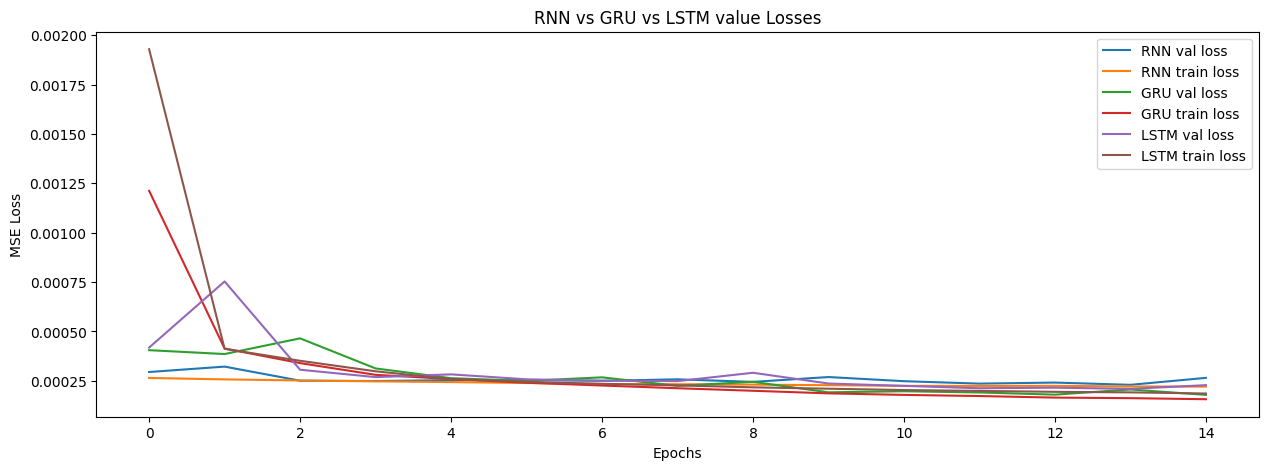

In [52]:
import matplotlib.pyplot as plt

# Completa el ejercicio

epochs = 15
batch_size = 24

rnn_history = model_rnn.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
)

gru_history = model_gru.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
)
lstm_history = model_lstm.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
)

plt.figure(figsize=(15, 5))

plt.plot(rnn_history.history['val_loss'], label = 'RNN val loss')
plt.plot(rnn_history.history['loss'], label = 'RNN train loss')

plt.plot(gru_history.history['val_loss'], label = 'GRU val loss')
plt.plot(gru_history.history['loss'], label = 'GRU train loss')

plt.plot(lstm_history.history['val_loss'], label = 'LSTM val loss')
plt.plot(lstm_history.history['loss'], label = 'LSTM train loss')

plt.title('RNN vs GRU vs LSTM value Losses')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

## 4.5. Hacer Predicciones Futuras y Comparar Rendimiento

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [0.5 pts.]:</strong> Predice valores futuros usando el conjunto de prueba y compara el rendimiento.</p>
</div>




In [53]:
from sklearn.metrics import mean_squared_error

# Completa el ejercicio

y_pred_rnn = model_rnn.predict(X_test)
y_pred_gru = model_gru.predict(X_test)
y_pred_lstm = model_lstm.predict(X_test)

mse_rnn = mean_squared_error(y_test, y_pred_rnn)
mse_gru = mean_squared_error(y_test, y_pred_gru)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)

print(f"RNN MSE: {mse_rnn:.4f}")
print(f"GRU MSE: {mse_gru:.4f}")
print(f"LSTM MSE: {mse_lstm:.4f}")

1363/1363 [==============================] - 3s 2ms/step
RNN MSE: 0.0003
GRU MSE: 0.0002
LSTM MSE: 0.0002


## 4.6. Experimentar con el Tamaño de Ventana

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [0.5 pts.]:</strong> Cambia el window_size para explorar cómo depende la predicción del intervalo de tiempo. Prueba por ejemplo con un tamaño de ventana de 48 horas.</p>
</div>




In [54]:

# Completa el ejercicio
window_hours = 48

X, y = [], []
for i in range(len(pjme_mw_scaled) - window_hours):
    X.append(pjme_mw_scaled[i:i + window_hours])
    y.append(pjme_mw_scaled[i + window_hours])

X = np.array(X)
y = np.array(y)

split_index = int(len(X) * 0.7)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

rnn_model = Sequential([
    SimpleRNN(units, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
gru_model = Sequential([
    GRU(units, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

lstm_model = Sequential([
    LSTM(units, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

rnn_model.compile(optimizer=Adam(), loss='mean_squared_error')
gru_model.compile(optimizer=Adam(), loss='mean_squared_error')
lstm_model.compile(optimizer=Adam(), loss='mean_squared_error')

In [55]:
epochs = 15
rnn_history = rnn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
gru_history = gru_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
lstm_history = lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/15
4239/4239 [==============================] - 21s 5ms/step - loss: 7.7187e-04 - val_loss: 2.5938e-04
Epoch 2/15
4239/4239 [==============================] - 23s 5ms/step - loss: 2.6580e-04 - val_loss: 2.9998e-04
Epoch 3/15
4239/4239 [==============================] - 31s 7ms/step - loss: 2.6709e-04 - val_loss: 2.7556e-04
Epoch 4/15
4239/4239 [==============================] - 32s 7ms/step - loss: 2.6995e-04 - val_loss: 3.1465e-04
Epoch 5/15
4239/4239 [==============================] - 32s 7ms/step - loss: 2.6685e-04 - val_loss: 3.3292e-04
Epoch 6/15
4239/4239 [==============================] - 32s 8ms/step - loss: 2.6092e-04 - val_loss: 2.7199e-04
Epoch 7/15
4239/4239 [==============================] - 32s 8ms/step - loss: 2.5711e-04 - val_loss: 3.0997e-04
Epoch 8/15
4239/4239 [==============================] - 32s 7ms/step - loss: 2.5189e-04 - val_loss: 2.6014e-04
Epoch 9/15
4239/4239 [==============================] - 32s 7ms/step - loss: 2.4688e-04 - val_loss: 2.5034e-04
E

In [56]:
y_pred_rnn = rnn_model.predict(X_test)
y_pred_gru = gru_model.predict(X_test)
y_pred_lstm = lstm_model.predict(X_test)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
mse_gru = mean_squared_error(y_test, y_pred_gru)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f"RNN MSE: {mse_rnn:.4f}")
print(f"GRU MSE: {mse_gru:.4f}")
print(f"LSTM MSE: {mse_lstm:.4f}")

1363/1363 [==============================] - 4s 3ms/step
RNN MSE: 0.0002
GRU MSE: 0.0002
LSTM MSE: 0.0002


The fact that increasing to 48 hours did not change much the performance beasically means that the model already captures enough relevevant patterns with 24, to see relevant changes we should try a bigger window but it wouldnt be that much of a difference

## 4.7. Modelo LSTM Profundo con Optimización de Hiperparámetros usando Optuna

Construir un modelo LSTM más profundo (con más capas) y utilizar Optuna para optimizar hiperparámetros clave. Luego comparar su rendimiento con los modelos anteriores (RNN, GRU y LSTM básico)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [1.75 pts.]:</strong> Definición del Modelo LSTM Profundo. Vamos a crear un modelo con:

<ul>
 <li>2 capas LSTM (con return_sequences=True en la primera para apilarlas).</li>
 <li>Capa Densa final.</li>
 <li>Dropout para regularización (evitar overfitting).</li>
 </ul>

Después toca definir hiperparámetros a Optimizar con Optuna.Optuna buscará la mejor combinación de:

 <ul>
  <li>Número de neuronas en cada capa LSTM: Entre 32 y 128.</li>
  <li>Tasa de Dropout: Entre 0.1 y 0.5.</li>
  <li>Tasa de aprendizaje (learning rate): Entre 1e-4 y 1e-2 (log scale).</li>
  <li>Batch size: 32, 64 o 128.</li>
 </ul>


 Por último, evalúa y compara con los modelos anteriores. Para ello te proporcionamos el código para mejor legibilidad.

 </p>

</div>





In [ ]:
# !pip install optuna # Recuerda instalar en caso de no tenerlo

In [62]:
from tensorflow.keras.layers import Dropout
import optuna

/home/stwart/anaconda3/envs/DLPEC2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [59]:
# Completa el ejercicio

window_size = 24  # Usando las últimas 24 horas para predecir la siguiente hora
X, y = [], []

for i in range(len(pjme_mw_scaled) - window_size):
    X.append(pjme_mw_scaled[i:i + window_size])
    y.append(pjme_mw_scaled[i + window_size])

X, y = np.array(X), np.array(y)

split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Modelo optuna
def lstm_model_optuna(trial):
    model = Sequential()

    units_1 = trial.suggest_int('units_1', 32, 128)
    units_2 = trial.suggest_int('units_2', 32, 128)

    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)

    model.add(LSTM(units_1, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))

    model.add(LSTM(units_2, activation='relu'))

    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    return model

In [68]:
def optuna_optimization_model(trial):
    model = lstm_model_optuna(trial)

    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    history = model.fit(X_train, y_train, epochs=10, 
                        batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
    val_loss = history.history['val_loss'][-1]
    return val_loss

In [70]:
optuna_solver = optuna.create_study(direction='minimize')
optuna_solver.optimize(optuna_optimization_model, n_trials=5)

best_hyper_param = optuna_solver.best_trial.params
print("Best hyperparameters: ", best_hyper_param)

best_model = lstm_model_optuna(optuna_solver.best_trial)
best_model.fit(X_train, y_train, epochs=10, batch_size=best_hyper_param['batch_size'], validation_data=(X_test, y_test))

[I 2025-04-21 20:53:29,067] A new study created in memory with name: no-name-97bbfbbf-6905-4b83-a31f-384e53ea1787
/tmp/ipykernel_3960/3062798650.py:23: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
/tmp/ipykernel_3960/3062798650.py:24: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/tmp/ipykernel_3960/772372060.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_logunifo

Best hyperparameters:  {'units_1': 119, 'units_2': 58, 'dropout_rate': 0.18689377166844132, 'learning_rate': 0.00037324808634836836, 'batch_size': 64}
Epoch 1/10
1817/1817 [==============================] - 58s 31ms/step - loss: 0.0052 - val_loss: 0.0016
Epoch 2/10
1817/1817 [==============================] - 56s 31ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 3/10
1817/1817 [==============================] - 56s 31ms/step - loss: 0.0013 - val_loss: 7.3100e-04
Epoch 4/10
1817/1817 [==============================] - 56s 31ms/step - loss: 9.9243e-04 - val_loss: 6.4740e-04
Epoch 5/10
1817/1817 [==============================] - 56s 31ms/step - loss: 7.9704e-04 - val_loss: 6.1803e-04
Epoch 6/10
1817/1817 [==============================] - 56s 31ms/step - loss: 6.8044e-04 - val_loss: 3.9959e-04
Epoch 7/10
1817/1817 [==============================] - 56s 31ms/step - loss: 6.2763e-04 - val_loss: 3.6160e-04
Epoch 8/10
1817/1817 [==============================] - 57s 31ms/step - loss: 5.9006e

909/909 [==============================] - 4s 5ms/step
MSE (Deep LSTM + Optuna): 0.000355
Comparación de MSE:
909/909 [==============================] - 1s 1ms/step
- RNN: 0.000276
909/909 [==============================] - 2s 2ms/step
- GRU: 0.000192
909/909 [==============================] - 2s 2ms/step
- LSTM básico: 0.000242
- LSTM profundo + Optuna: 0.000355
7/7 [==============================] - 0s 2ms/step


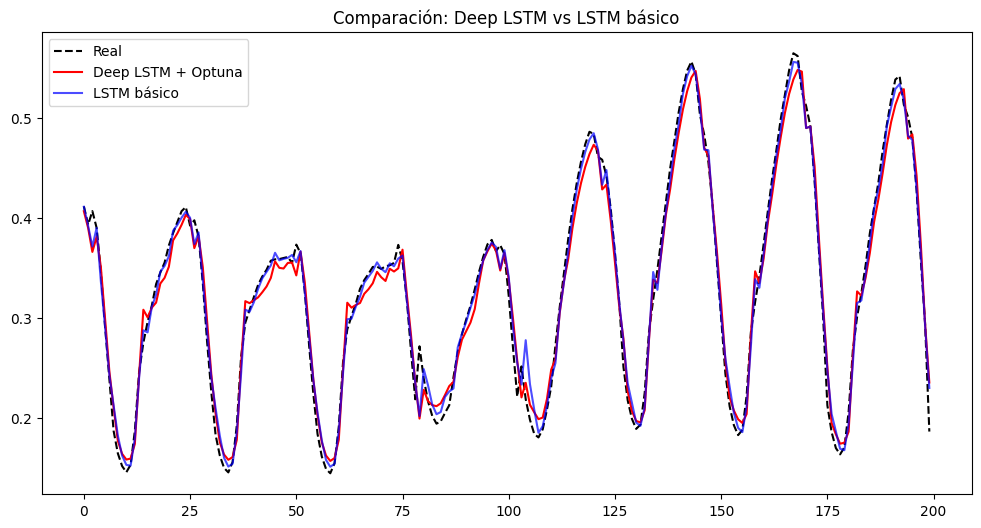

In [71]:
# Evaluar el modelo profundo
deep_lstm_mse = mean_squared_error(y_test, best_model.predict(X_test))
print(f"MSE (Deep LSTM + Optuna): {deep_lstm_mse:.6f}")

# Comparar con modelos anteriores (ejercicio 5)
print("Comparación de MSE:")
print(f"- RNN: {mean_squared_error(y_test, model_rnn.predict(X_test)):.6f}")
print(f"- GRU: {mean_squared_error(y_test, model_gru.predict(X_test)):.6f}")
print(f"- LSTM básico: {mean_squared_error(y_test, model_lstm.predict(X_test)):.6f}")
print(f"- LSTM profundo + Optuna: {deep_lstm_mse:.6f}")

# Gráfico comparativo de predicciones (primeras 200 muestras)
plt.figure(figsize=(12, 6))
plt.plot(y_test[:200], label='Real', color='black', linestyle='--')
plt.plot(best_model.predict(X_test[:200]), label='Deep LSTM + Optuna', color='red')
plt.plot(model_lstm.predict(X_test[:200]), label='LSTM básico', color='blue', alpha=0.7)
plt.legend()
plt.title("Comparación: Deep LSTM vs LSTM básico")
plt.show()

LSTM combined with the optuna optimizer smooth out some of the sharper transitions, which basically means that will improve the overall aligment in the real data peaks, although it's also noticeable that the performance is simply slightly better than a normal LSTM so in this case optuna optimization is not really worth the time consuming hyperparameters fining.

# External Resources

- https://www.themachinelearners.com/modelos-secuencia/

- https://www.kaggle.com/code/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru
